In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Dhaka Rent.csv",sep=';')

In [ ]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [ ]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [ ]:
df.shape

(60, 2)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.isnull().sum()

,0
area,0
rent,0


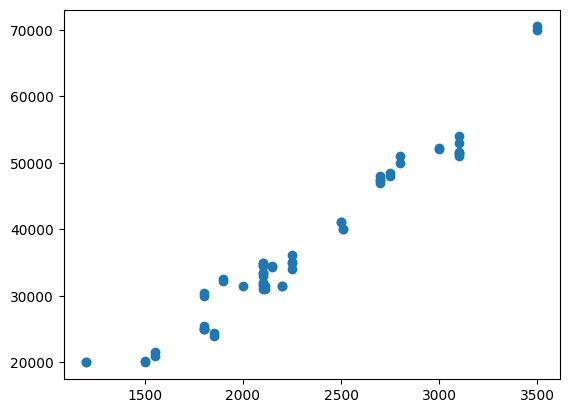

In [ ]:
plt.scatter(df['area'],df['rent'])

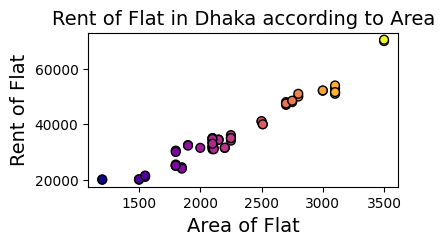

In [ ]:
plt.figure(figsize=(4,2))

plt.xlabel("Area of Flat", loc='center',fontsize=14,weight=20)
plt.ylabel("Rent of Flat", loc='center',fontsize=14,weight=20)
plt.title("Rent of Flat in Dhaka according to Area", loc='center',fontsize=14,weight=30)

plt.scatter(df['area'],df['rent'],
            s = 40,
            c = df['area'],
            cmap= 'plasma',
            alpha= 1,
            edgecolors='k'
            )

In [ ]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


**Implementing Linear Regression using Math Formula**

In [ ]:
x = df['area']
y = df['rent']

dev_x = x - np.mean(x)
dev_y = y - np.mean(y)

m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)
c = np.mean(y) - (m * np.mean(x))

In [ ]:
m

np.float64(21.292661473611954)

In [ ]:
c

np.float64(-11469.7354464311)

In [ ]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [ ]:
#y = mx+c
#y0
m * 2000 + c

np.float64(31115.58750079281)

In [ ]:
#y1
m * 2100 + c

np.float64(33244.85364815401)

In [ ]:
#y2
m * 2500 + c

np.float64(41761.91823759879)

In [ ]:
#y3
m * 2250 + c

np.float64(36438.7528691958)

In [ ]:
#y4
m * 3000 + c

np.float64(52408.24897440476)

**Using Scikit Learn**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['area']],df['rent'])

LinearRegression()

In [ ]:
reg.coef_

array([21.29266147])

In [ ]:
reg.intercept_

np.float64(-11469.735446431114)

In [ ]:
df2 = df.copy()

In [ ]:
df2['Predicted Rent'] = reg.predict(df[['area']])

In [ ]:
df2.head()

,area,rent,Predicted Rent
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


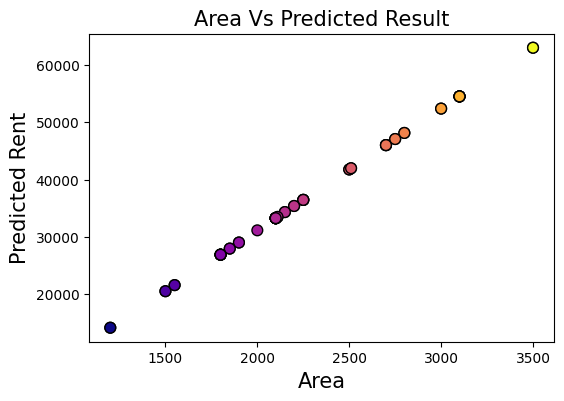

In [ ]:
plt.figure(figsize=(6,4))

plt.title('Area Vs Predicted Result', fontsize=15, weight=30)
plt.xlabel('Area', loc='center', fontsize=15, weight=20)
plt.ylabel('Predicted Rent', loc='center', fontsize=15, weight=20)

plt.scatter(
    df2['area'], df2['Predicted Rent'],
    s = 60,
    c = df['area'],
    cmap='plasma',
    alpha = 1,
    edgecolors='k'
)

In [ ]:
reg.score(df[['area']],df['rent'])

0.950249380357677

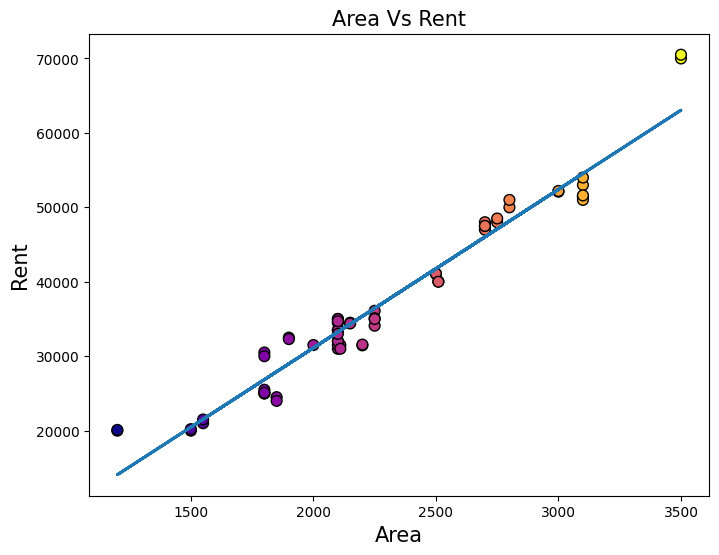

In [ ]:
from matplotlib.lines import lineStyles
plt.figure(figsize=(8,6))

plt.plot(df['area'],df2['Predicted Rent'], linewidth=2, markersize=12)

plt.title('Area Vs Rent', fontsize=15, weight=30)
plt.xlabel('Area', loc='center', fontsize=15, weight=20)
plt.ylabel('Rent', loc='center', fontsize=15, weight=20)

plt.scatter(
    df['area'], df['rent'],
    s = 60,
    c = df['area'],
    cmap='plasma',
    alpha = 1,
    edgecolors='k'
)

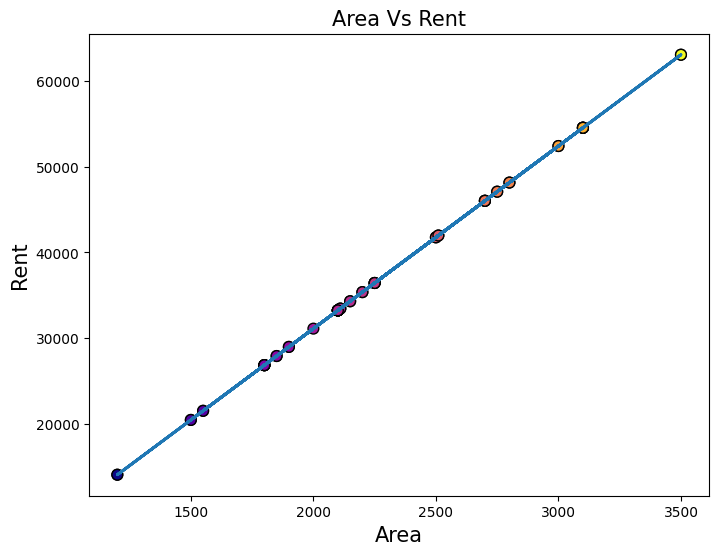

In [ ]:
from matplotlib.lines import lineStyles
plt.figure(figsize=(8,6))

plt.plot(df['area'],df2['Predicted Rent'], linewidth=2, markersize=12)

plt.title('Area Vs Rent', fontsize=15, weight=30)
plt.xlabel('Area', loc='center', fontsize=15, weight=20)
plt.ylabel('Rent', loc='center', fontsize=15, weight=20)

plt.scatter(
    df['area'], df2['Predicted Rent'],
    s = 60,
    c = df['area'],
    cmap='plasma',
    alpha = 1,
    edgecolors='k'
)

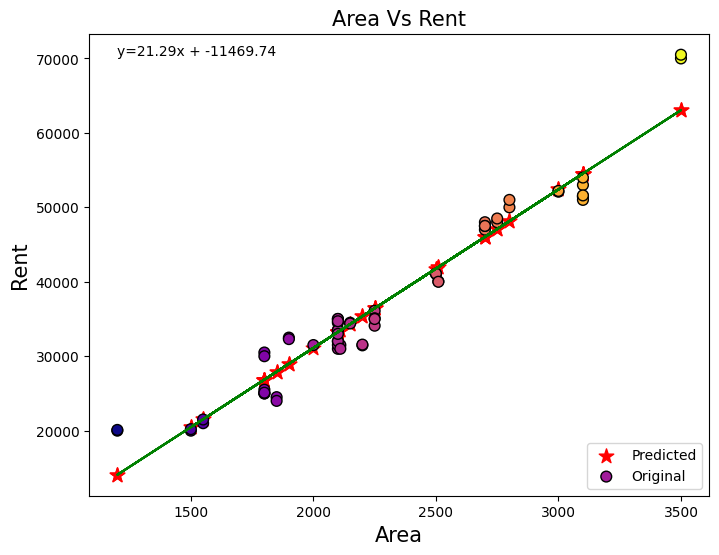

In [ ]:
from matplotlib.lines import lineStyles
plt.figure(figsize=(8,6))

equ = f"y={float(m):.2f}x + {float(c):.2f}"

plt.text(min(df['area']), max(df['rent'])-30, equ)

plt.scatter(df2['area'],df2['Predicted Rent'],color='red',marker='*',s = 120, alpha=1, label='Predicted')

plt.plot(df['area'],df2['Predicted Rent'],color = 'green')

plt.title('Area Vs Rent', fontsize=15, weight=30)
plt.xlabel('Area', loc='center', fontsize=15, weight=20)
plt.ylabel('Rent', loc='center', fontsize=15, weight=20)

plt.scatter(
    df['area'], df['rent'],
    s = 60,
    c = df['area'],
    cmap='plasma',
    alpha = 1,
    edgecolors='k',
    label='Original'
)

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_absolute_error(df[['rent']],df2['Predicted Rent'])

2009.8695093576282

In [ ]:
mean_squared_error(df[['rent']],df2['Predicted Rent'])

6778077.204095561